In [76]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
#Load data, training and test sets
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

## Knowing the dataset

In [3]:
print('train data dimensions:',train_data.shape,'\n')
print('test data dimensions:',test_data.shape,'\n')
features=train_data.keys()
print(features)
train_data.describe()

train data dimensions: (891, 12) 

test data dimensions: (418, 11) 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print('train data information')
print('\n')
train_data.info()
print('\n')
print('test data information')
print('\n')
test_data.info()

train data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


test data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [11]:
#Diferent class for each feature
for i in train_data.keys():
    print(i,len(train_data[i].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


## Removing data

In [12]:
# I removed the name column because it isn't important for the analize
train_data.drop(columns='Name',inplace=True)
test_data.drop(columns='Name',inplace=True)

In [14]:
#Made a data copy, it can be necessary later
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

In [15]:
#Removed other columns
train_data.drop(columns=['SibSp','Parch','Ticket','Fare','Cabin'],inplace=True)
test_data.drop(columns=['SibSp','Parch','Ticket','Fare','Cabin'],inplace=True)

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


## Converting data in int form

In [21]:
gen={'male':1,'female':0} #I'll make a map with this values for sex and embarked
em={'S':1,'C':2,'Q':3}
data=[train_data,test_data]
for dataset in data:
    dataset['Embarked'].fillna(0,inplace=True)

In [22]:
train_data['Embarked'].unique()

array([1., 2., 3., 0.])

In [19]:
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(em)
    dataset['Sex']=dataset['Sex'].map(gen)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,1.0
1,2,1,1,0,38.0,2.0
2,3,1,3,0,26.0,1.0
3,4,1,1,0,35.0,1.0
4,5,0,3,1,35.0,1.0


In [26]:
#Verify the number of instances without the age
media=train_data['Age'].mean()
np.sum(train_data['Age'].isnull())

177

In [27]:
#Replace the missing data with the media
train_data['Age'].fillna(media,inplace=True)
test_data['Age'].fillna(media,inplace=True)

In [28]:
#Convert the float data in in data
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset['Embarked']=dataset['Embarked'].astype(int)

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22,1
1,2,1,1,0,38,2
2,3,1,3,0,26,1
3,4,1,1,0,35,1
4,5,0,3,1,35,1


## Graphs

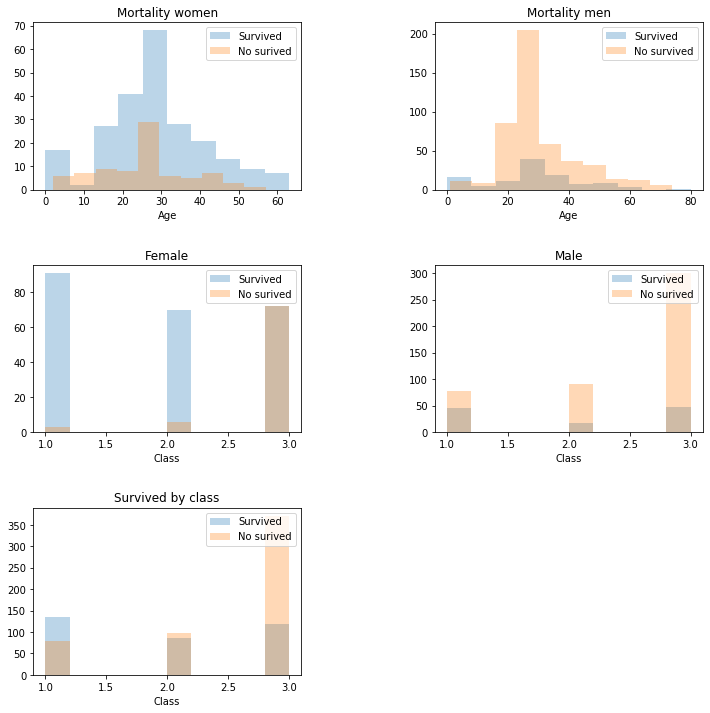

In [77]:
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=False, bins=10)
women=train_data[train_data['Sex']==0]
men=train_data[train_data['Sex']==1]
fig=plt.figure()
fig.subplots_adjust(hspace=0.45, wspace=0.5)
fig.set_figheight(12)
fig.set_figwidth(12)

plt.subplot(3,2,1)
plt.hist(women['Age'][women['Survived']==1],**kwargs,label='Survived');
plt.hist(women['Age'][women['Survived']==0],**kwargs,label='No surived');
plt.xlabel('Age')
plt.title('Mortality women')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(men['Age'][men['Survived']==1],**kwargs,label='Survived');
plt.hist(men['Age'][men['Survived']==0],**kwargs,label='No survived');
plt.xlabel('Age')
plt.title('Mortality men')
plt.legend()

plt.subplot(3, 2, 3)
plt.hist(women['Pclass'][women['Survived']==1],**kwargs,label='Survived');
plt.hist(women['Pclass'][women['Survived']==0],**kwargs,label='No surived');
plt.xlabel('Class')
plt.title('Female')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(men['Pclass'][men['Survived']==1],**kwargs,label='Survived');
plt.hist(men['Pclass'][men['Survived']==0],**kwargs,label='No surived');
plt.xlabel('Class')
plt.title('Male')
plt.legend()

plt.subplot(3, 2, 5)
plt.hist(train_data['Pclass'][train_data['Survived']==1],**kwargs,label='Survived');
plt.hist(train_data['Pclass'][train_data['Survived']==0],**kwargs,label='No surived');
plt.xlabel('Class')
plt.title('Survived by class')
plt.legend()

## Split the data

In [78]:
X_train=train_data.drop(columns='Survived',axis=1)
y_train=train_data['Survived']
X_train.drop(columns='PassengerId',inplace=True)

In [79]:
X_train.head()

,Pclass,Sex,Age,Embarked
0,3,1,22,1
1,1,0,38,2
2,3,0,26,1
3,1,0,35,1
4,3,1,35,1


In [80]:
X_test=test_data.drop(columns='PassengerId').copy()

## Applied Machine Learning algorithms

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_test=model.predict(X_test)
result=model.score(X_train,y_train)
print(result)

0.3873856954176961


We can see that it's a bad algorithm in this case, bacause the model quality is low

## Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)
y_test1=model1.predict(X_test)
result1=model1.score(X_train,y_train)
print(result1)

0.7867564534231201


## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_test2=model2.predict(X_test)
result2=model2.score(X_train,y_train)
print(result2)

0.7901234567901234


The last two models predict in a best form the result, how i can see in the quality model

## Save the result

I can choose one of the last two models for obtain our result and submmit my answer, with around 80% of effectiveness

In [85]:
send1=test_data_copy.loc[:,('PassengerId','Survived')].copy()
send1.to_csv('submission1.csv',index=False)